 # <center> Tweet Analysis: Combining Sentiment Insights and Time Series Forecasts
***

Name: **Natalia Iolchin**

Student No: **sba23303**

Assignment: **MSc_DA_CA2**
***

<a class="anchor" id="0.1"></a>
# Table of Contents

### [1. Notebook Settings/Requirements](#1)
### [2. Data Processing](#2)
### [3. Sentiment Analysis](#3)
* [**3.1 EDA**](#3.1)
* [**3.2 Multinomial Naive Bias**](#3.2)
* [**3.2 LSTM**](#3.3)
### [4. Time-Series Forecasting](#4)
* [**4.1 Auto Arima Forecasting & Dashboard**](#4.1)
* [**4.2 LSTM Forecasting**](#4.2)



<a class="anchor" id="1"></a>
## 1. Notebook Settings/Requirements
[Back to Table of Contents](#0.1)

The command **!pip freeze** is used in Python to create a file containing a list of all installed Python packages and their respective versions in the current environment.

This file can be shared with others or used for reproducibility purposes. It allows someone else to recreate the same Python environment by running pip install -r requirements.txt, which installs all the listed packages and their specific versions. This is commonly used in Python projects to manage dependencies and ensure consistent environments across different systems.
* https://pip.pypa.io/en/stable/cli/pip_freeze/

!pip freeze > requirements.txt

**Used Python 3 environment comes with many helpful analytics libraries installed**

To make the code easier to understand, read and debug, all Python libraries are placed at the beginning of the code. 

To make the code cleaner, warning messages were turned off. This was done to remove unnecessary alerts and make the output easier to read.

In [36]:
# Data manipulation
import pandas as pd
from datetime import datetime
from collections import Counter
import string
import re
import numpy as np


# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
from wordcloud import WordCloud

# Time series analysis
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Natural language processing (NLP)
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download("vader_lexicon")

# Deep learning
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmitri.iolchin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dmitri.iolchin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**pandas:** This library is used for handling and manipulating structured data through DataFrame objects, offering functionalities for data cleaning, exploration, and analysis.
* https://pandas.pydata.org/

**numpy:** It is a fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to operate on these arrays. It is commonly used for various numerical computations and linear algebra operations.
* https://numpy.org/

**Matplotlib and Seaborn:** Fundamental for static visualizations, Matplotlib forms the base for Seaborn, which offers simplified syntax and enhanced visualizations. Both libraries provide extensive plot types and customization options.
* https://matplotlib.org/
* https://seaborn.pydata.org/

**Plotly Express:** Known for interactive visualizations and dashboards, Plotly Express facilitates the creation of dynamic and interactive plots, which are useful for web-based presentations and exploratory data analysis.
* https://plotly.com/python/plotly-express/

**WordCloud:** Specifically designed for text analysis, the WordCloud library generates visual representations of word frequency in textual data, aiding in identifying prominent terms or themes within text.
* https://www.wordclouds.com/

**scipy.stats:** Offers statistical functions and tests, including Shapiro-Wilk test (shapiro), Mann-Whitney U test (mannwhitneyu), and other statistical methods.
* https://docs.scipy.org/doc/scipy/reference/stats.html

**sklearn.metrics:** Provides tools for evaluating model performance, such as mean absolute error (mean_absolute_error) and mean squared error (mean_squared_error).
* https://scikit-learn.org/stable/modules/model_evaluation.html

**pmdarima:** A library providing auto ARIMA functionality for automatic time series modeling.
* https://pypi.org/project/pmdarima/

**statsmodels.formula.api:** Allows for specifying models using R-style formulas.

**statsmodels.tsa:** Specifically for time series analysis, including ARIMA modeling (ARIMA), augmented Dickey-Fuller test (adfuller), autocorrelation and partial autocorrelation function plotting (plot_acf, plot_pacf), among others.

**statsmodels.api:** Extensive statistical modeling tools and functions.
* https://www.statsmodels.org

**string:** This library provides a collection of string constants and functions to manipulate strings in Python. It includes useful constants like ASCII letters, digits, punctuation, and various string-related utility functions.
* https://docs.python.org/3/library/string.html

**nltk:** natural language processing (NLP) toolkit in Python, offering a wide range of tools and resources for text processing and analysis.
* https://www.nltk.org/

**sklearn:**  machine learning library in Python. It provides a wide array of tools and algorithms for machine learning tasks, including classification, regression, clustering, dimensionality reduction, and model selection. Scikit-learn is known for its user-friendly interface and extensive documentation, making it a preferred choice for machine learning practitioners and researchers.
* https://scikit-learn.org/stable/


<a class="anchor" id="2"></a>
## 2. Data Processing
[Back to Table of Contents](#0.1)

In [25]:
df = pd.read_csv('exported_data.csv',  index_col=None)
df.head()

,timestamp,day_of_week,text_cleaned
0,2009-04-06T23:20:20.000+01:00,Mon,iamjazzyfizzle i wish i got to watch it with y...
1,2009-04-06T23:20:40.000+01:00,Mon,angry barista i baked you a cake but i ated it
2,2009-04-06T23:20:41.000+01:00,Mon,blagh class at 8 tomorrow
3,2009-04-06T23:20:05.000+01:00,Mon,tatiana k nope they didn t have it
4,2009-04-06T23:21:39.000+01:00,Mon,bed class 8 12 work 12 3 gym 3 5 or 6 then...


In [3]:
# Create a variable to store the comments as text
X = df['text_cleaned']

# Check the result
X.head()

0    iamjazzyfizzle i wish i got to watch it with y...
1       angry barista i baked you a cake but i ated it
2                            blagh class at 8 tomorrow
3                   tatiana k nope they didn t have it
4    bed  class 8 12  work 12 3  gym 3 5 or 6  then...
Name: text_cleaned, dtype: object

In [4]:
# Create an instance of SentimentIntensityAnalyzer
sentiment_analyser = SentimentIntensityAnalyzer()

In [5]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Store the string.punctuation into an object punct
punct = string.punctuation

# Initialise an object using a method PorterStemmer
stemmer = PorterStemmer()

In [6]:
# Create an empty list to store the data
data=[]

# Create a for loop to clean available text comments & store them in a created list 'data'
for i in range(len(X)):
    words = X.iloc[i].split()  # Splitting the text into words
    
    # Converting each word to lowercase and removing non-alphabetic characters
    words = [word.lower() for word in words if word.isalpha()]
    
    # Removing stop words and punctuation, and stemming
    words = [stemmer.stem(word) for word in words if (word not in stop_words) and (word not in punct)]
    
    cleaned_text = ' '.join(words)  # Joining the cleaned words back into a string
    data.append(cleaned_text)  # Store and update the result in the data

In [7]:
#Checking the created list
data[:5]

['iamjazzyfizzl wish got watch miss iamlilnicki premier',
 'angri barista bake cake ate',
 'blagh class tomorrow',
 'tatiana k nope',
 'bed class work gym class anoth day gonna fli miss girlfriend']

In [8]:
# Create a function to get scores for sentiments
def get_sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)['compound']
    return sentiment_score

In [9]:
# Apply the function to each element from the list
sentiment_scores = list(map(get_sentiment_score, data))
# Checking the result
sentiment_scores[:10]

[0.2732, 0.0, 0.0, 0.0, -0.1531, 0.3612, 0.0, 0.0, 0.5267, -0.4767]

In [10]:
# store the result in the data frame "sentiment"
sentiment = pd.DataFrame({'Text': data, 'Score': sentiment_scores})

sentiment.head()

,Text,Score
0,iamjazzyfizzl wish got watch miss iamlilnicki ...,0.2732
1,angri barista bake cake ate,0.0000
2,blagh class tomorrow,0.0000
3,tatiana k nope,0.0000
4,bed class work gym class anoth day gonna fli m...,-0.1531


In [11]:
# Create a function to map the compound scores to a particular polarity classification
def format_output(compound_score):
    polarity = "neutral"
    if compound_score >= 0.05:
        polarity = "positive"
    elif compound_score <= -0.05:
        polarity = "negative"
    return polarity

In [12]:
# Create a new column 'Polarity' using the format_output function
sentiment['Polarity'] = sentiment['Score'].apply(format_output)

# Validate results
sentiment.head()

,Text,Score,Polarity
0,iamjazzyfizzl wish got watch miss iamlilnicki ...,0.2732,positive
1,angri barista bake cake ate,0.0000,neutral
2,blagh class tomorrow,0.0000,neutral
3,tatiana k nope,0.0000,neutral
4,bed class work gym class anoth day gonna fli m...,-0.1531,negative


In [13]:
# Displaying the first five rows of the 'Score' column in the 'sentiment' DataFrame
print(sentiment['Score'][:5])

0    0.2732
1    0.0000
2    0.0000
3    0.0000
4   -0.1531
Name: Score, dtype: float64


In [14]:
# Group by the 'polarity' column and count the number of rows for each category
pol = sentiment.groupby('Polarity').count()

# Validate results
pol.head()

,Text,Score
Polarity,,
negative,334456,334456
neutral,551026,551026
positive,712833,712833


<a class="anchor" id="3"></a>
## 3. Sentiment Analysis
[Back to Table of Contents](#0.1)

In [16]:
sentiment.to_csv('sa.csv', index=False)

In [26]:
sentiment = pd.read_csv('sa.csv',  index_col=None)

<a class="anchor" id="3.1"></a>
## 3.1 EDA
[Back to Table of Contents](#0.1)

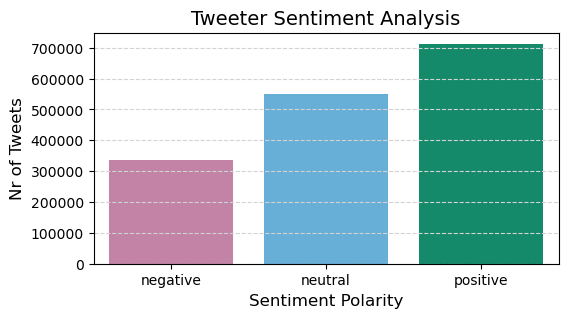

In [15]:
# Define custom colors for each sentiment
colors = {'negative': '#CC79A7', 'neutral': '#56B4E9', 'positive': '#009E73'}

# Plot the monthly average passengers totals using a bar chart
plt.figure(figsize = (6, 3))
sns.barplot(data = pol, x = pol.index, y = 'Score', palette = colors)
plt.xlabel('Sentiment Polarity', size = 12)
plt.ylabel('Nr of Tweets', size = 12)
plt.title('Tweeter Sentiment Analysis', size = 14)
plt.grid(axis = 'y', color='lightgrey', linestyle='--', linewidth = 0.8)
plt.show()

In [27]:
ts = pd.concat([df, sentiment[['Score', 'Polarity']]], axis=1)
ts.head()

,timestamp,day_of_week,text_cleaned,Score,Polarity
0,2009-04-06T23:20:20.000+01:00,Mon,iamjazzyfizzle i wish i got to watch it with y...,0.2732,positive
1,2009-04-06T23:20:40.000+01:00,Mon,angry barista i baked you a cake but i ated it,0.0000,neutral
2,2009-04-06T23:20:41.000+01:00,Mon,blagh class at 8 tomorrow,0.0000,neutral
3,2009-04-06T23:20:05.000+01:00,Mon,tatiana k nope they didn t have it,0.0000,neutral
4,2009-04-06T23:21:39.000+01:00,Mon,bed class 8 12 work 12 3 gym 3 5 or 6 then...,-0.1531,negative


In [28]:
# Convert 'date' column to datetime
ts['timestamp'] = pd.to_datetime(ts['timestamp'])

# Extract date and time components
ts['date'] = ts['timestamp'].dt.strftime('%Y-%m-%d')
ts['time'] = ts['timestamp'].dt.strftime('%H:00:00')

# Mapping dictionary for day abbreviations to numerical values
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}

# Apply mapping to the 'day_of_week' column
ts['day_numeric'] = ts['day_of_week'].map(day_mapping)

ts.head()

,timestamp,day_of_week,text_cleaned,Score,Polarity,date,time,day_numeric
0,2009-04-06 23:20:20+01:00,Mon,iamjazzyfizzle i wish i got to watch it with y...,0.2732,positive,2009-04-06,23:00:00,1
1,2009-04-06 23:20:40+01:00,Mon,angry barista i baked you a cake but i ated it,0.0000,neutral,2009-04-06,23:00:00,1
2,2009-04-06 23:20:41+01:00,Mon,blagh class at 8 tomorrow,0.0000,neutral,2009-04-06,23:00:00,1
3,2009-04-06 23:20:05+01:00,Mon,tatiana k nope they didn t have it,0.0000,neutral,2009-04-06,23:00:00,1
4,2009-04-06 23:21:39+01:00,Mon,bed class 8 12 work 12 3 gym 3 5 or 6 then...,-0.1531,negative,2009-04-06,23:00:00,1


In [29]:
ts = ts[['text_cleaned','Score', 'Polarity', 'date', 'time', 'day_numeric']]

In [30]:
ts.head()

,text_cleaned,Score,Polarity,date,time,day_numeric
0,iamjazzyfizzle i wish i got to watch it with y...,0.2732,positive,2009-04-06,23:00:00,1
1,angry barista i baked you a cake but i ated it,0.0000,neutral,2009-04-06,23:00:00,1
2,blagh class at 8 tomorrow,0.0000,neutral,2009-04-06,23:00:00,1
3,tatiana k nope they didn t have it,0.0000,neutral,2009-04-06,23:00:00,1
4,bed class 8 12 work 12 3 gym 3 5 or 6 then...,-0.1531,negative,2009-04-06,23:00:00,1


In [31]:
ts.to_csv('ts.csv', index=False)

In [29]:
ts = pd.read_csv('ts.csv',  index_col=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598315 entries, 0 to 1598314
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   text_cleaned  1598315 non-null  object 
 1   Score         1598315 non-null  float64
 2   Polarity      1598315 non-null  object 
 3   date          1598315 non-null  object 
 4   time          1598315 non-null  object 
 5   day_numeric   1598315 non-null  int64  
 6   text_length   1598315 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 85.4+ MB
None
              Score   day_numeric   text_length
count  1.598315e+06  1.598315e+06  1.598315e+06
mean   1.391207e-01  4.305468e+00  7.210490e+01
std    4.034585e-01  2.258894e+00  3.644341e+01
min   -9.985000e-01  1.000000e+00  2.000000e+00
25%    0.000000e+00  2.000000e+00  4.200000e+01
50%    0.000000e+00  5.000000e+00  6.700000e+01
75%    4.404000e-01  6.000000e+00  1.020000e+02
max    9.967000e-01  7.000000e+

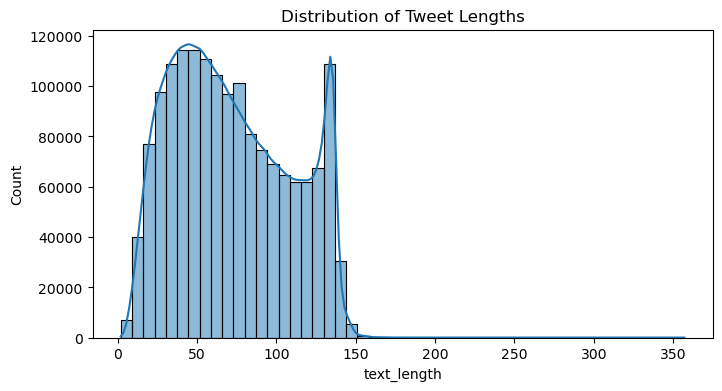

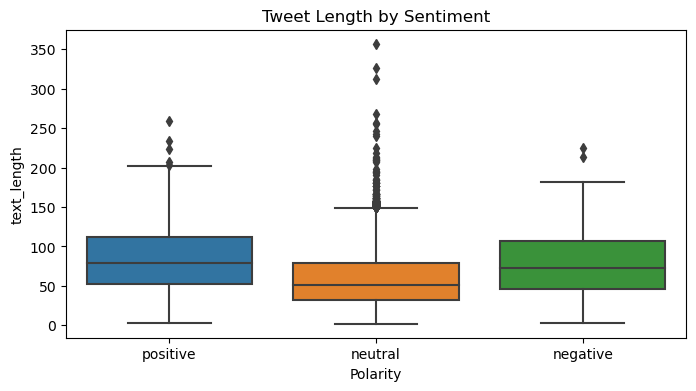

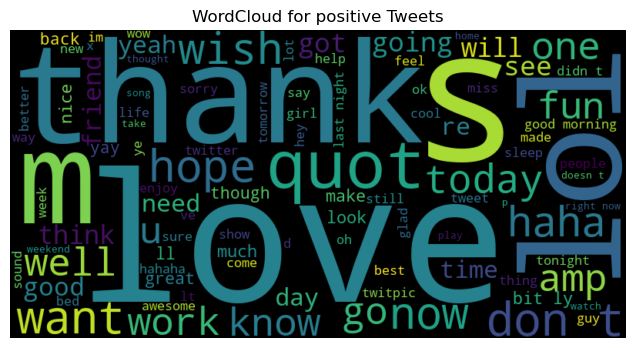

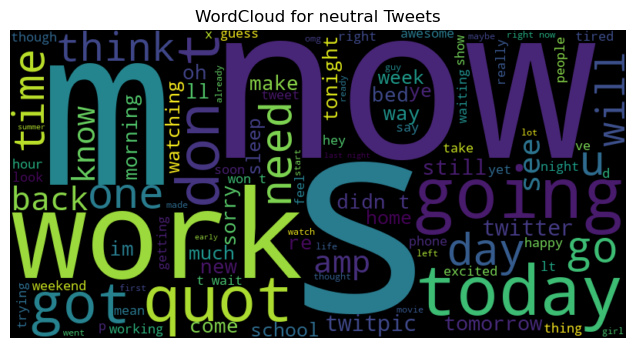

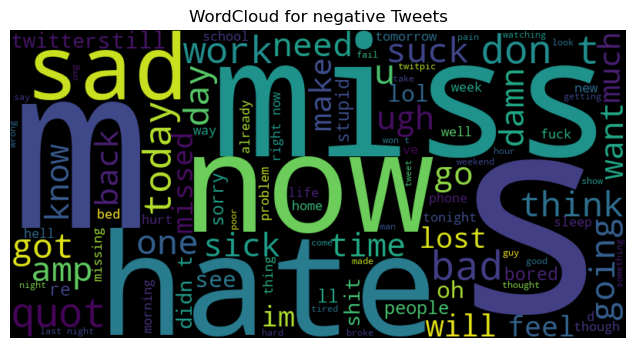

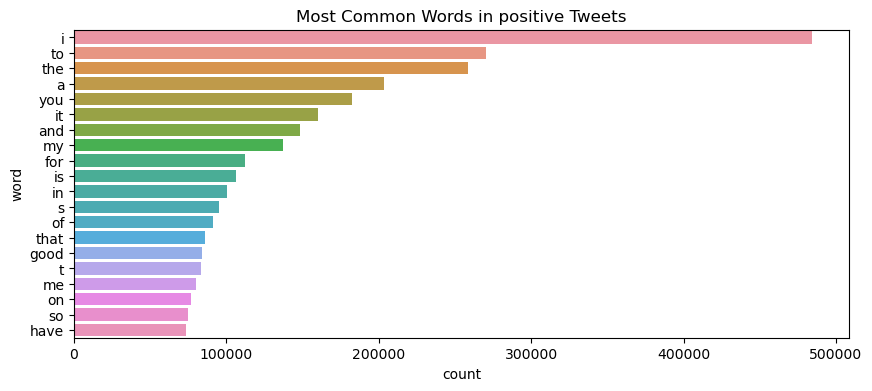

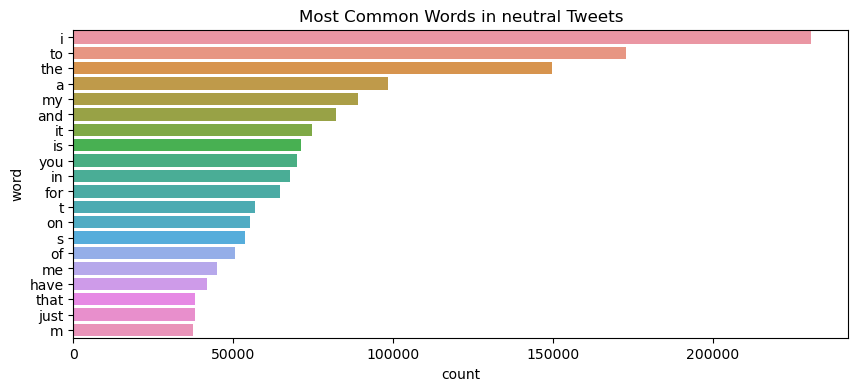

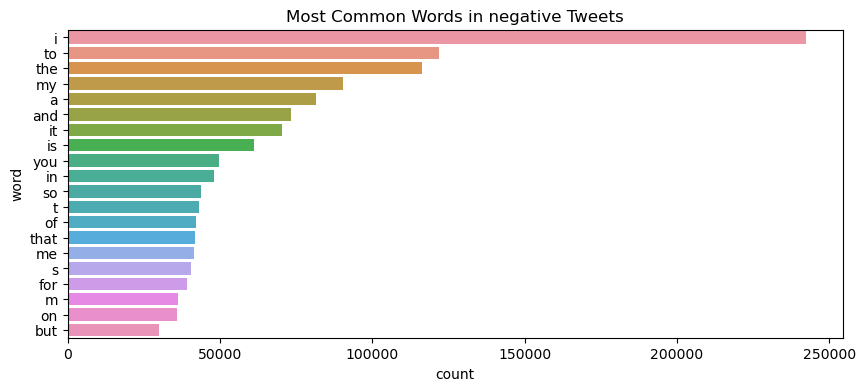

In [31]:
# Display basic information about the dataframe
print(ts.info())
print(ts.describe())

# Check for missing values
print(ts.isnull().sum())

# Analyze the length of the tweets
ts['text_length'] = ts['text_cleaned'].apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(ts['text_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Polarity', y='text_length', data=ts)
plt.title('Tweet Length by Sentiment')
plt.show()

# Common words and phrases
def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(data))
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# WordCloud for each sentiment
for sentiment in ts['Polarity'].unique():
    plot_wordcloud(ts[ts['Polarity'] == sentiment]['text_cleaned'], f'WordCloud for {sentiment} Tweets')

# Most common words for each sentiment
for sentiment in ts['Polarity'].unique():
    words = ' '.join(ts[ts['Polarity'] == sentiment]['text_cleaned']).split()
    common_words = Counter(words).most_common(20)
    common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

    plt.figure(figsize=(10, 4))
    sns.barplot(x='count', y='word', data=common_words_df)
    plt.title(f'Most Common Words in {sentiment} Tweets')
    plt.show()

In [6]:
ts = pd.read_csv('ts.csv',  index_col=None)
ts.head()

,text_cleaned,Score,Polarity,date,time,day_numeric
0,iamjazzyfizzle i wish i got to watch it with y...,0.2732,positive,2009-04-06,23:00:00,1
1,angry barista i baked you a cake but i ated it,0.0000,neutral,2009-04-06,23:00:00,1
2,blagh class at 8 tomorrow,0.0000,neutral,2009-04-06,23:00:00,1
3,tatiana k nope they didn t have it,0.0000,neutral,2009-04-06,23:00:00,1
4,bed class 8 12 work 12 3 gym 3 5 or 6 then...,-0.1531,negative,2009-04-06,23:00:00,1


<Figure size 1200x800 with 0 Axes>

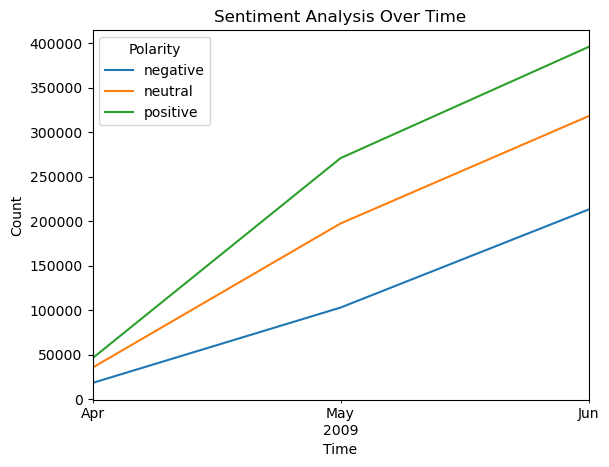

In [7]:
# Sentiment Analysis Over Time
ts['timestamp'] = pd.to_datetime(ts['date'] + ' ' + ts['time'])
ts.drop(['date', 'time'], axis=1, inplace=True)

ts.set_index('timestamp', inplace=True)
ts_resampled = ts.groupby([pd.Grouper(freq='M'), 'Polarity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
ts_resampled.plot()
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

<a class="anchor" id="3.2"></a>
## 3.2 Multinomial Naive Bias
[Back to Table of Contents](#0.1)

In [20]:
# Pre-processing and Bag of Word Vectorization using Count Vectorizer

# Tokenizing text using a regular expression tokenizer to extract alphanumeric sequences
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Initializing the CountVectorizer with specified parameters
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

# Transforming the text data into a matrix of token counts using CountVectorizer
text_counts = cv.fit_transform(sentiment['Text'])

In [23]:
#Splitting the data into trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, sentiment['Polarity'], test_size=0.2, random_state=5)

In [24]:
# Shape of the Bag-of-Words vectorized text data
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1598315, 488148), (1278652, 488148), (319663, 488148), (1278652,), (319663,))

In [28]:
# Training the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Multinomial Naive Bias Accuracuy Score: ",accuracy_score)

Multinomial Naive Bias Accuracuy Score:  0.8537303347587929


In [29]:
# Instantiate a method
cf = classification_report(Y_test, predicted)

# Display the values
print(cf)

              precision    recall  f1-score   support

    negative       0.86      0.78      0.82     66777
     neutral       0.94      0.78      0.85    110155
    positive       0.80      0.95      0.87    142731

    accuracy                           0.85    319663
   macro avg       0.87      0.83      0.85    319663
weighted avg       0.86      0.85      0.85    319663



In [40]:
# Check the score for a negative comment for sentiment analysis
comment = 'Stuck in traffic again just what I needed after a long day frustration'
MNB.predict_proba(cv.transform([comment]))[0][1]

0.0855404780890058

In [35]:
# Check the score for a positive comment for sentiment analysis
comment = "Spent the day with loved ones, feeling grateful for their presence "
MNB.predict_proba(cv.transform([comment]))[0][1]

0.3141954183270073

In [23]:
sentiment.head()

,Text,Score,Polarity
0,iamjazzyfizzl wish got watch miss iamlilnicki ...,0.2732,positive
1,angri barista bake cake ate,0.0000,neutral
2,blagh class tomorrow,0.0000,neutral
3,tatiana k nope,0.0000,neutral
4,bed class work gym class anoth day gonna fli m...,-0.1531,negative


<a class="anchor" id="3.3"></a>
## 3.3 LSTM
[Back to Table of Contents](#0.1)

In [94]:
# Load and prepare data
X = sentiment['Text']
y = sentiment['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert non-string values to string
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in sequences_train)
X_train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')


In [95]:
# Define hyperparameters grid manually
units_options = [32, 64, 128]
embedding_dim_options = [8, 16, 32]
dropout_rate_options = [0.0, 0.1, 0.2]

best_mse = float('inf')
best_params = {}

# Manual hyperparameter tuning
for units in units_options:
    for embedding_dim in embedding_dim_options:
        for dropout_rate in dropout_rate_options:
            model = Sequential([
                Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length),
                LSTM(units=units),
                Dropout(dropout_rate),
                Dense(units=1, activation='tanh')
            ])
            model.compile(optimizer='adam', loss='mean_squared_error')
            model.fit(X_train_padded, y_train, epochs=5, batch_size=32, verbose=0)
            y_pred = model.predict(X_test_padded)
            mse = mean_squared_error(y_test, y_pred)
            
            if mse < best_mse:
                best_mse = mse
                best_params = {'units': units, 'embedding_dim': embedding_dim, 'dropout_rate': dropout_rate}

print(f"Best Hyperparameters: {best_params}")
print(f"Test MSE with Best Model: {best_mse:.4f}")

9990/9990 [==============================] - 150s 15ms/step
Best Hyperparameters: {'units': 128, 'embedding_dim': 16, 'dropout_rate': 0.0}
Test MSE with Best Model: 0.0013


In [27]:
# Extracting text and score columns
X = sentiment['Text']
y = sentiment['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert non-string values to string
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_length = max(len(seq) for seq in sequences_train)
X_train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}")



Epoch 1/5

39958/39958 [==============================] - 814s 20ms/step - loss: 0.0058 - val_loss: 0.0015
Epoch 2/5
39958/39958 [==============================] - 774s 19ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/5
39958/39958 [==============================] - 774s 19ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/5
39958/39958 [==============================] - 727s 18ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/5
9990/9990 [==============================] - 73s 7ms/step - loss: 0.0014
Test Loss: 0.0014


In [37]:
# Tokenize and pad the new comment
sequence = tokenizer.texts_to_sequences(["""Just received the best news ever! 
                                         I got accepted into my dream university with a full scholarship! 
                                         Feeling incredibly grateful and excited for the amazing journey ahead!
                                         #DreamsComeTrue #Grateful #Excited """])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Predict the sentiment score for the comment using the trained LSTM model
predicted_score = model.predict(padded_sequence)[0][0]

# Print the predicted sentiment score
print("Predicted Sentiment Score:", predicted_score)

1/1 [==============================] - 0s 27ms/step
Predicted Sentiment Score: 0.7356644


In [38]:
# Tokenize and pad the new comment
sequence = tokenizer.texts_to_sequences(["""This has been the worst day of my life. 
                                            Everything that could go wrong has gone wrong. 
                                            I feel completely defeated and hopeless. #WorstDayEver #FeelingDown """])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

# Predict the sentiment score for the comment using the trained LSTM model
predicted_score = model.predict(padded_sequence)[0][0]

# Print the predicted sentiment score
print("Predicted Sentiment Score:", predicted_score)

1/1 [==============================] - 0s 33ms/step
Predicted Sentiment Score: -0.9139241


<a class="anchor" id="4"></a>
## 4. Time-Series Forecasting
[Back to Table of Contents](#0.1)

In [3]:
ts = pd.read_csv('ts.csv',  index_col=None)

In [8]:
ts = ts[['Score']]
ts.head()

,Score
timestamp,
2009-04-06 23:00:00,0.2732
2009-04-06 23:00:00,0.0000
2009-04-06 23:00:00,0.0000
2009-04-06 23:00:00,0.0000
2009-04-06 23:00:00,-0.1531


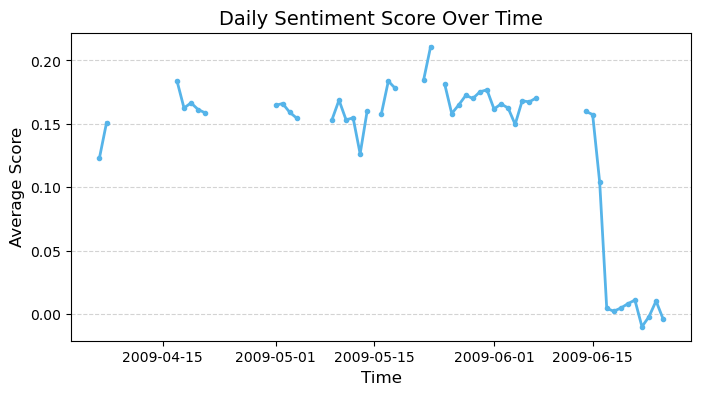

In [16]:
# Resample the data by day and calculate the mean score
ts_resampled = ts['Score'].resample('D').mean()

# Plot the daily average scores using a line chart
plt.figure(figsize=(8, 4))
plt.plot(ts_resampled, marker='.', linestyle='-', color='#56B4E9', linewidth=2, markersize=6)
plt.xlabel('Time', size=12)
plt.ylabel('Average Score', size=12)
plt.title('Daily Sentiment Score Over Time', size=14)
plt.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.8)
plt.show()

<a class="anchor" id="4.1"></a>
## 4.1  Auto Arima Forecasting & Dashboard
[Back to Table of Contents](#0.1)

In [27]:
# Interpolate missing values
ts['Score'] = ts['Score'].interpolate(method='time')

# Check for any remaining missing values
print(ts.isnull().sum())

# Resample the data by day and calculate the mean score
ts_resampled = ts['Score'].resample('D').mean()

# Ensure there are no gaps by forward filling after resampling
ts_resampled = ts_resampled.ffill()

# Plot the daily average scores using a line chart
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=ts_resampled.index,
    y=ts_resampled,
    mode='lines',
    name='Historical Data',
    line=dict(color='#56B4E9'),
    marker=dict(size=6)
))

# Use auto_arima to determine the best model
model = auto_arima(ts_resampled, seasonal=False, stepwise=True, suppress_warnings=True)

# Fit the best model
model_fit = model.fit(ts_resampled)

# Forecast the next 7 days
forecast = model_fit.predict(n_periods=7)
forecast_dates = pd.date_range(start=ts_resampled.index[-1] + pd.Timedelta(days=1), periods=7)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

# Add forecast data trace
fig.add_trace(go.Scatter(
    x=forecast_df.index,
    y=forecast_df['Forecast'],
    mode='lines',
    name='Forecast',
    line=dict(color='#CC79A7', dash='dash'),
    marker=dict(size=6)
))

fig.update_layout(
    title='Daily Sentiment Score and Forecast',
    xaxis_title='Time',
    yaxis_title='Average Score',
    legend_title='Data',
    xaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=0.8),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=0.8)
)

# Show the plot in the Jupyter Notebook
pio.show(fig)

Score    0
dtype: int64


<a class="anchor" id="4.2"></a>
## 4.2  LSTM Forecasting
[Back to Table of Contents](#0.1)

In [42]:
# Load the dataframe
ts = pd.read_csv('ts.csv')

# Combine date and time columns into a timestamp
ts['timestamp'] = pd.to_datetime(ts['date'] + ' ' + ts['time'])
ts.drop(['date', 'time'], axis=1, inplace=True)

# Set timestamp as the index
ts.set_index('timestamp', inplace=True)

# Interpolate missing values
ts['Score'] = ts['Score'].interpolate(method='time')

# Resample the data by day and calculate the mean score
ts_resampled = ts['Score'].resample('D').mean()

# Ensure there are no gaps by forward filling after resampling
ts_resampled = ts_resampled.ffill()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts_resampled.values.reshape(-1, 1))

# Prepare the data for the LSTM model
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=10, batch_size=64, verbose=1)

# Forecast the next 1, 3, and 7 days
def forecast_days(model, data, time_step, scaler, days=1):
    temp_input = list(data[-time_step:])
    lst_output = []
    for _ in range(days):
        temp_input_array = np.array(temp_input).reshape((1, time_step, 1))
        yhat = model.predict(temp_input_array, verbose=0)
        temp_input = temp_input[1:]  # Maintain the fixed size of temp_input
        temp_input.append(yhat[0])
        lst_output.append(yhat[0])
    return scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

forecast_1_day = forecast_days(model, scaled_data, time_step, scaler, days=1)
forecast_3_days = forecast_days(model, scaled_data, time_step, scaler, days=3)
forecast_7_days = forecast_days(model, scaled_data, time_step, scaler, days=7)

# Create a DataFrame for the forecast
forecast_dates_1_day = pd.date_range(start=ts_resampled.index[-1] + pd.Timedelta(days=1), periods=1)
forecast_dates_3_days = pd.date_range(start=ts_resampled.index[-1] + pd.Timedelta(days=1), periods=3)
forecast_dates_7_days = pd.date_range(start=ts_resampled.index[-1] + pd.Timedelta(days=1), periods=7)

forecast_df_1_day = pd.DataFrame(forecast_1_day, index=forecast_dates_1_day, columns=['Forecast_1_Day'])
forecast_df_3_days = pd.DataFrame(forecast_3_days, index=forecast_dates_3_days, columns=['Forecast_3_Days'])
forecast_df_7_days = pd.DataFrame(forecast_7_days, index=forecast_dates_7_days, columns=['Forecast_7_Days'])

# Plot the results
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=ts_resampled.index,
    y=ts_resampled,
    mode='lines+markers',
    name='Historical Data',
    line=dict(color='#56B4E9'),
    marker=dict(size=6)
))

# Add forecast data traces
fig.add_trace(go.Scatter(
    x=forecast_df_1_day.index,
    y=forecast_df_1_day['Forecast_1_Day'],
    mode='lines+markers',
    name='Forecast 1 Day',
    line=dict(color='#CC79A7', dash='dash'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=forecast_df_3_days.index,
    y=forecast_df_3_days['Forecast_3_Days'],
    mode='lines+markers',
    name='Forecast 3 Days',
    line=dict(color='#FF5733', dash='dash'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=forecast_df_7_days.index,
    y=forecast_df_7_days['Forecast_7_Days'],
    mode='lines+markers',
    name='Forecast 7 Days',
    line=dict(color='#33FF57', dash='dash'),
    marker=dict(size=6)
))

fig.update_layout(
    title='Daily Sentiment Score and LSTM Forecast',
    xaxis_title='Time',
    yaxis_title='Average Score',
    legend_title='Data',
    xaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=0.8),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=0.8)
)

fig.show()

Epoch 1/10
2/2 [==============================] - 5s 12ms/step - loss: 0.5867
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 0.3757
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 0.2142
Epoch 4/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0942
Epoch 5/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0385
Epoch 6/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0693
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0940
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 0.0677
Epoch 9/10
2/2 [==============================] - 0s 12ms/step - loss: 0.0428
Epoch 10/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0357


In [83]:
# Convert 'Score' column to numpy array
scores = ts['Score'].values.reshape(-1, 1)

# Normalize scores
scaler = MinMaxScaler(feature_range=(0, 1))
scores_scaled = scaler.fit_transform(scores)

# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scores_scaled, seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions to original scale
predictions_inv = scaler.inverse_transform(predictions)

# Print some sample predictions
print("Sample Predictions:")
for i in range(5):
    print(f"Predicted: {predictions_inv[i][0]:.2f}, Actual: {scaler.inverse_transform(y_test[i].reshape(-1, 1))[0][0]:.2f}")

Epoch 1/50
39958/39958 [==============================] - 214s 5ms/step - loss: 0.0406 - val_loss: 0.0404
Epoch 2/50
39958/39958 [==============================] - 211s 5ms/step - loss: 0.0405 - val_loss: 0.0404
Epoch 3/50
39958/39958 [==============================] - 213s 5ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 4/50
39958/39958 [==============================] - 212s 5ms/step - loss: 0.0404 - val_loss: 0.0405
Epoch 5/50
39958/39958 [==============================] - 212s 5ms/step - loss: 0.0404 - val_loss: 0.0405
Epoch 6/50
39958/39958 [==============================] - 206s 5ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 7/50
39958/39958 [==============================] - 195s 5ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 8/50
39958/39958 [==============================] - 194s 5ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 9/50
39958/39958 [==============================] - 194s 5ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 10/50
39958/39958 [=====================